# Ensemble Learning

#### Ugur URESIN, AI Engineer | Data Scientist
#### Mail: uresin.ugur@gmail.com

The **refence** of this notebook is given:  
https://machinelearningmastery.com/stacking-ensemble-for-deep-learning-neural-networks/

This notebook is divided into six steps as follows:

* Stacked Generalization Ensemble
* Multi-Class Classification Problem
* Multilayer Perceptron Model
* Train and Save Sub-Models
* Separate Stacking Model
* Integrated Stacking Model

## Chapter 01. Stacked Generalization Ensebmle

A model averaging ensemble combines the predictions from multiple trained models.  

**Average Ensemble:** Each model contributes the same amount to the prediction regardless of how well the model performed.  

**Weighted Average Ensemble:** Weighting the models based on their performance on a holdout dataset.  

**Stacked Generalization (Stacking):** Replacing the linear weighted sum (e.g. linear regression) to combine the predictions of the sub-models with any learning algorithm.  



## Chapter 02. Multi-Class Classification Problem

In [44]:
## IMPORTING LIBRARIES
import numpy as np
import sklearn as sk
from sklearn.datasets import make_blobs

#### Creating a Dataset

The scikit-learn class provides the make_blobs() function to generate dataset with the prescribed number of samples, input variables, classes, and variance of samples within a class.

In [45]:
## EXAMPLE USAGE OF make_blobs()
X, y = make_blobs(n_samples=3, centers=2, n_features=2, cluster_std=1, random_state=0)
print("X: \n", X)
print("y: \n", y)

# mean of the flattened array 
print("\nmean of arr, axis = None : ", np.mean(X)) 
    
# mean along the axis = 0 
print("\nmean of arr, axis = 0 : ", np.mean(X, axis = 0)) 
   
# mean along the axis = 1 
print("\nmean of arr, axis = 1 : ", np.mean(X, axis = 1))

X: 
 [[2.84382807 3.32650945]
 [1.9263585  4.15243012]
 [1.95204867 1.30826216]]
y: 
 [0 0 1]

mean of arr, axis = None :  2.584906160501141

mean of arr, axis = 0 :  [2.24074508 2.92906724]

mean of arr, axis = 1 :  [3.08516876 3.03939431 1.63015542]


In [46]:
# Generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

#### Visualizing the Dataset

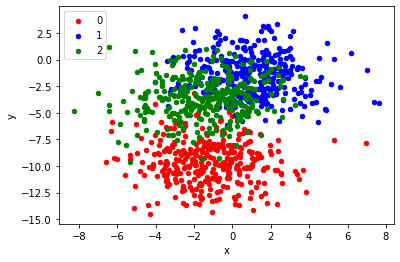

In [47]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

## Chapter 03. Multilayer Perceptron Model

* Let's create a dataset with 1,100 points.  
* The model will be trained on the first 100 points and the remaining 1,000 will be held back in a test dataset, unavailable to the model.  
* The problem is a multi-class classification problem, and we will model it using a softmax activation function on the output layer. 
* This means that the model will predict a vector with three elements with the probability that the sample belongs to each of the three classes.
* Therefore, we must one hot encode the class values before we split the rows into the train and test datasets. We can do this using the Keras to_categorical() function.

#### Dataset Creation

In [48]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)

# one hot encode output variable
from keras.utils import to_categorical
y = to_categorical(y)

# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)

(100, 2) (1000, 2)


#### Model Creation

In [49]:
from keras import Sequential
from keras.layers import Dense

## MODEL DEFINITION
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Fitting Model

In [50]:
history = model.fit(trainX, trainy, validation_data=(testX, testy),
                    epochs=500,
                    verbose=1)

Epoch 1/500
4/4 [==============================] - 0s 43ms/step - loss: 1.0963 - accuracy: 0.4100 - val_loss: 1.0996 - val_accuracy: 0.3790
Epoch 2/500
4/4 [==============================] - 0s 8ms/step - loss: 1.0549 - accuracy: 0.4300 - val_loss: 1.0557 - val_accuracy: 0.3850
Epoch 3/500
4/4 [==============================] - 0s 8ms/step - loss: 1.0134 - accuracy: 0.4300 - val_loss: 1.0234 - val_accuracy: 0.3900
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 0.9852 - accuracy: 0.4300 - val_loss: 0.9995 - val_accuracy: 0.3910
Epoch 5/500
4/4 [==============================] - 0s 8ms/step - loss: 0.9672 - accuracy: 0.4300 - val_loss: 0.9802 - val_accuracy: 0.3920
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 0.9490 - accuracy: 0.4300 - val_loss: 0.9655 - val_accuracy: 0.3980
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: 0.9347 - accuracy: 0.4400 - val_loss: 0.9514 - val_accuracy: 0.4020
Epoch 8/500
4/4 [=========

4/4 [==============================] - 0s 8ms/step - loss: 0.5945 - accuracy: 0.7400 - val_loss: 0.6565 - val_accuracy: 0.7210
Epoch 60/500
4/4 [==============================] - 0s 8ms/step - loss: 0.5912 - accuracy: 0.7600 - val_loss: 0.6519 - val_accuracy: 0.7240
Epoch 61/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5883 - accuracy: 0.7500 - val_loss: 0.6495 - val_accuracy: 0.7250
Epoch 62/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5849 - accuracy: 0.7400 - val_loss: 0.6475 - val_accuracy: 0.7320
Epoch 63/500
4/4 [==============================] - 0s 8ms/step - loss: 0.5834 - accuracy: 0.7400 - val_loss: 0.6446 - val_accuracy: 0.7360
Epoch 64/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5805 - accuracy: 0.7300 - val_loss: 0.6423 - val_accuracy: 0.7370
Epoch 65/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5779 - accuracy: 0.7300 - val_loss: 0.6392 - val_accuracy: 0.7450
Epoch 66/500
4/4 [===============

4/4 [==============================] - 0s 7ms/step - loss: 0.4858 - accuracy: 0.7900 - val_loss: 0.5523 - val_accuracy: 0.7700
Epoch 118/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4845 - accuracy: 0.7900 - val_loss: 0.5486 - val_accuracy: 0.7780
Epoch 119/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4821 - accuracy: 0.8000 - val_loss: 0.5473 - val_accuracy: 0.7790
Epoch 120/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4805 - accuracy: 0.8000 - val_loss: 0.5450 - val_accuracy: 0.7810
Epoch 121/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4790 - accuracy: 0.8000 - val_loss: 0.5430 - val_accuracy: 0.7810
Epoch 122/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4782 - accuracy: 0.8100 - val_loss: 0.5424 - val_accuracy: 0.7810
Epoch 123/500
4/4 [==============================] - 0s 9ms/step - loss: 0.4771 - accuracy: 0.8100 - val_loss: 0.5412 - val_accuracy: 0.7810
Epoch 124/500
4/4 [========

4/4 [==============================] - 0s 7ms/step - loss: 0.4245 - accuracy: 0.8100 - val_loss: 0.4945 - val_accuracy: 0.7940
Epoch 176/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4237 - accuracy: 0.8100 - val_loss: 0.4936 - val_accuracy: 0.7960
Epoch 177/500
4/4 [==============================] - 0s 6ms/step - loss: 0.4234 - accuracy: 0.8100 - val_loss: 0.4918 - val_accuracy: 0.7980
Epoch 178/500
4/4 [==============================] - 0s 6ms/step - loss: 0.4226 - accuracy: 0.8100 - val_loss: 0.4897 - val_accuracy: 0.8030
Epoch 179/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4226 - accuracy: 0.8100 - val_loss: 0.4887 - val_accuracy: 0.8030
Epoch 180/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4225 - accuracy: 0.8100 - val_loss: 0.4882 - val_accuracy: 0.8030
Epoch 181/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4226 - accuracy: 0.8200 - val_loss: 0.4886 - val_accuracy: 0.8030
Epoch 182/500
4/4 [========

4/4 [==============================] - 0s 7ms/step - loss: 0.3930 - accuracy: 0.8100 - val_loss: 0.4680 - val_accuracy: 0.8110
Epoch 234/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3922 - accuracy: 0.8200 - val_loss: 0.4680 - val_accuracy: 0.8110
Epoch 235/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3910 - accuracy: 0.8200 - val_loss: 0.4675 - val_accuracy: 0.8110
Epoch 236/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3907 - accuracy: 0.8200 - val_loss: 0.4675 - val_accuracy: 0.8100
Epoch 237/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3888 - accuracy: 0.8200 - val_loss: 0.4684 - val_accuracy: 0.8090
Epoch 238/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3880 - accuracy: 0.8200 - val_loss: 0.4722 - val_accuracy: 0.8020
Epoch 239/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3881 - accuracy: 0.8200 - val_loss: 0.4741 - val_accuracy: 0.7980
Epoch 240/500
4/4 [========

4/4 [==============================] - 0s 7ms/step - loss: 0.3680 - accuracy: 0.8400 - val_loss: 0.4572 - val_accuracy: 0.8090
Epoch 292/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3674 - accuracy: 0.8100 - val_loss: 0.4558 - val_accuracy: 0.8160
Epoch 293/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3675 - accuracy: 0.8300 - val_loss: 0.4535 - val_accuracy: 0.8190
Epoch 294/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3666 - accuracy: 0.8200 - val_loss: 0.4522 - val_accuracy: 0.8160
Epoch 295/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3665 - accuracy: 0.8100 - val_loss: 0.4518 - val_accuracy: 0.8200
Epoch 296/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3677 - accuracy: 0.8200 - val_loss: 0.4520 - val_accuracy: 0.8240
Epoch 297/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3672 - accuracy: 0.8200 - val_loss: 0.4526 - val_accuracy: 0.8260
Epoch 298/500
4/4 [========

4/4 [==============================] - 0s 9ms/step - loss: 0.3539 - accuracy: 0.8200 - val_loss: 0.4530 - val_accuracy: 0.8160
Epoch 350/500
4/4 [==============================] - 0s 8ms/step - loss: 0.3540 - accuracy: 0.8100 - val_loss: 0.4563 - val_accuracy: 0.8180
Epoch 351/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3535 - accuracy: 0.8300 - val_loss: 0.4577 - val_accuracy: 0.8130
Epoch 352/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3552 - accuracy: 0.8300 - val_loss: 0.4584 - val_accuracy: 0.8150
Epoch 353/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3545 - accuracy: 0.8300 - val_loss: 0.4578 - val_accuracy: 0.8130
Epoch 354/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3538 - accuracy: 0.8200 - val_loss: 0.4577 - val_accuracy: 0.8120
Epoch 355/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3539 - accuracy: 0.8200 - val_loss: 0.4585 - val_accuracy: 0.8120
Epoch 356/500
4/4 [========

4/4 [==============================] - 0s 7ms/step - loss: 0.3431 - accuracy: 0.8200 - val_loss: 0.4529 - val_accuracy: 0.8170
Epoch 408/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3456 - accuracy: 0.8300 - val_loss: 0.4533 - val_accuracy: 0.8170
Epoch 409/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3460 - accuracy: 0.8300 - val_loss: 0.4532 - val_accuracy: 0.8170
Epoch 410/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3445 - accuracy: 0.8300 - val_loss: 0.4530 - val_accuracy: 0.8150
Epoch 411/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3430 - accuracy: 0.8200 - val_loss: 0.4537 - val_accuracy: 0.8130
Epoch 412/500
4/4 [==============================] - 0s 8ms/step - loss: 0.3414 - accuracy: 0.8200 - val_loss: 0.4550 - val_accuracy: 0.8100
Epoch 413/500
4/4 [==============================] - 0s 8ms/step - loss: 0.3407 - accuracy: 0.8100 - val_loss: 0.4561 - val_accuracy: 0.8120
Epoch 414/500
4/4 [========

4/4 [==============================] - 0s 7ms/step - loss: 0.3341 - accuracy: 0.8400 - val_loss: 0.4584 - val_accuracy: 0.8110
Epoch 466/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3337 - accuracy: 0.8400 - val_loss: 0.4595 - val_accuracy: 0.8060
Epoch 467/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3338 - accuracy: 0.8400 - val_loss: 0.4613 - val_accuracy: 0.8040
Epoch 468/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3341 - accuracy: 0.8500 - val_loss: 0.4607 - val_accuracy: 0.8050
Epoch 469/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3339 - accuracy: 0.8500 - val_loss: 0.4595 - val_accuracy: 0.8100
Epoch 470/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3333 - accuracy: 0.8300 - val_loss: 0.4582 - val_accuracy: 0.8130
Epoch 471/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3326 - accuracy: 0.8300 - val_loss: 0.4581 - val_accuracy: 0.8100
Epoch 472/500
4/4 [========

#### Model Evaluation

In [51]:
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.850, Test: 0.806


#### Performance Visualization

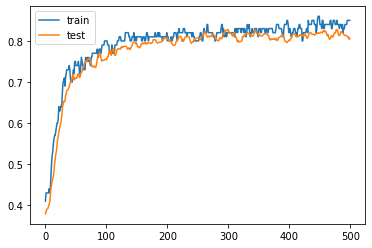

In [52]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## Chapter 04. Train and Save Sub-Models

In [53]:
## A FUNCTION to DEFINE & FIT an MLP MODEL

def fit_model(trainX, trainy):
    # Model deifinition
    model = Sequential()
    model.add(Dense(25, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Fitting the model
    model.fit(trainX, trainy, epochs=500, verbose=0)
    return model

#### Creating Multiple MLP Models

In [54]:
n_members = 5

for i in range(n_members):
    # Fitting the model
    model = fit_model(trainX, trainy)
    
    # Saving the model
    filename = 'ensemble_models/mlp/model_' + str(i + 1) + '.h5'
    model.save(filename)
    print('>Saved %s' % filename)

>Saved ensemble_models/mlp/model_1.h5
>Saved ensemble_models/mlp/model_2.h5
>Saved ensemble_models/mlp/model_3.h5
>Saved ensemble_models/mlp/model_4.h5
>Saved ensemble_models/mlp/model_5.h5


## Chapter 05. Separate Stacking Model

In this section, a meta-learner that will best combine the predictions from the sub-models and ideally perform better than any single sub-model will be trained.

In [55]:
from keras.models import load_model

In [56]:
# load models from file
def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        # define filename for this ensemble
        filename = 'ensemble_models/mlp/model_' + str(i + 1) + '.h5'
        # load model from file
        model = load_model(filename)
        # add to list of members
        all_models.append(model)
        print('>loaded %s' % filename)
    return all_models

In [57]:
# load all models
n_members = 5
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

>loaded ensemble_models/mlp/model_1.h5
>loaded ensemble_models/mlp/model_2.h5
>loaded ensemble_models/mlp/model_3.h5
>loaded ensemble_models/mlp/model_4.h5
>loaded ensemble_models/mlp/model_5.h5
Loaded 5 models


It would be useful to know how well the single models perform on the test dataset as we would expect a stacking model to perform better.

We can easily evaluate each single model on the training dataset and establish a baseline of performance.

In [58]:
# evaluate standalone models on test dataset
for model in members:
    testy_enc = to_categorical(testy)
    _, acc = model.evaluate(testX, testy_enc, verbose=0)
    print('Model Accuracy: %.3f' % acc)

ValueError: in user code:

    C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1176 test_step
        self.compiled_loss(
    C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 3, 2) and (None, 3) are incompatible


In [59]:
testX.shape

(1000, 2)

In [60]:
testy.shape

(1000, 3)

In [61]:
testy_enc.shape

(1000, 3, 2)